# DESCRIPTION 
Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. Zalando seeks to replace the original MNIST dataset

Training set - 60,000 examples
Test set - 10,000 examples
Each example is a 28x28 grayscale image
10 classes

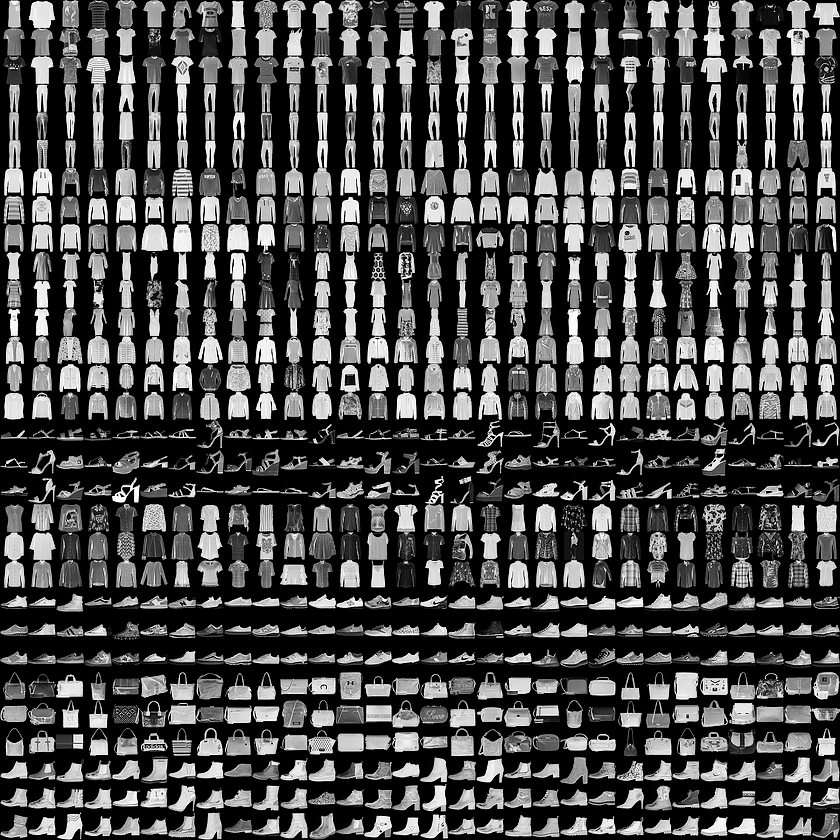

### Load the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [2]:
print(f' Tensorflow version for this project is {tf.__version__}')

 Tensorflow version for this project is 1.14.0


### Load the Dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("/cxldata/datasets/project/fashion-mnist")

W0630 07:08:06.039275 140096269117248 deprecation.py:323] From <ipython-input-2-975a031a623b>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0630 07:08:06.040430 140096269117248 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0630 07:08:06.043236 140096269117248 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future ve

Extracting /cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz


W0630 07:08:06.405971 140096269117248 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0630 07:08:06.472844 140096269117248 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting /cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz


### Analysing Dataset :
- Reshape the data 
- Data Normalisation to put them on same scale
- Splitting into Training and Testing separately

In [16]:
train_data = fashion_mnist.train.images                       # Returns np.array
train_labels = np.asarray(fashion_mnist.train.labels, dtype=np.int32)
x_train, y_train = train_data, train_labels

eval_data = fashion_mnist.test.images                        # Returns np.array
eval_labels = np.asarray(fashion_mnist.test.labels, dtype=np.int32)
x_test, y_test = eval_data, eval_labels

train_x = x_train.reshape(55000, 28, 28, 1).astype('float32') / 255.0
test_x = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

train_y = to_categorical(y_train, 10)  # One Hot Encoding
test_y = to_categorical(y_test, 10)

print(f'Shape of our X_Train dataset is ; {train_x.shape}')
print(f'Shape of our X_Test dataset is ; {test_x.shape}')
print(f'Shape of our Y_Train dataset is ; {train_y.shape}')
print(f'Shape of our Y_Test dataset is ; {test_y.shape}')

Shape of our X_Train dataset is ; (55000, 28, 28, 1)
Shape of our X_Test dataset is ; (10000, 28, 28, 1)
Shape of our Y_Train dataset is ; (55000, 10)
Shape of our Y_Test dataset is ; (10000, 10)


## Model Building, Training, Testing and Visualizing : TENSORFLOW
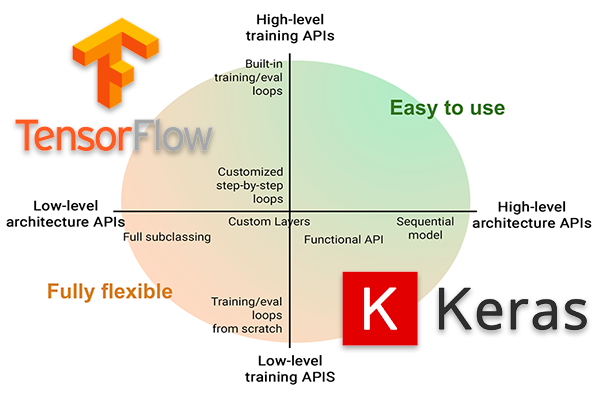
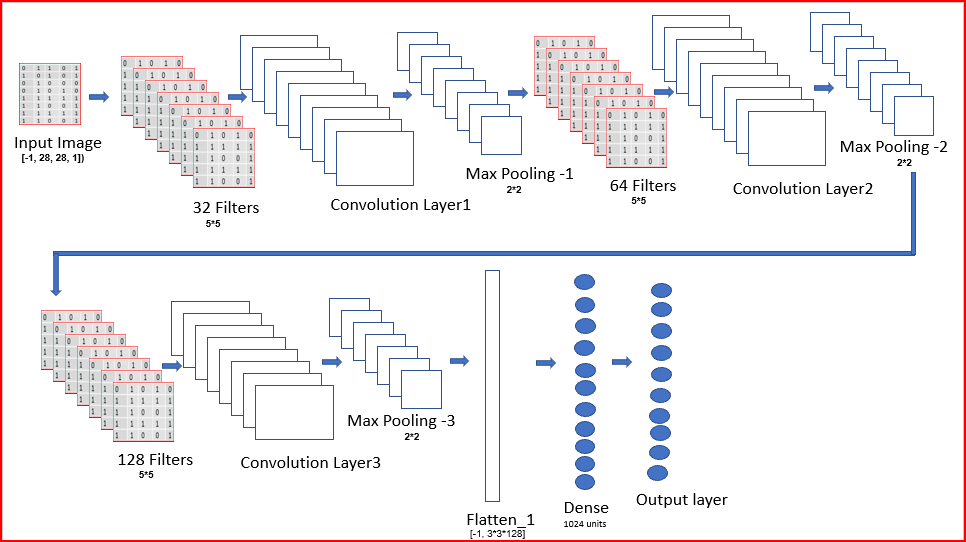

In [5]:
def model_architecture_4(input_shape, number_of_classes, learning_rate) :
    
    input_layer = tf.placeholder(tf.float32, shape=input_shape)   
    labels = tf.placeholder(tf.float32, shape=[None, number_of_classes])
    
    train_mode = tf.placeholder(tf.bool) # Used for Drop-out layer and work only in Training phase
    
    
    conv_layer_1 = tf.layers.conv2d(inputs=input_layer, 
                                    filters=32, 
                                    kernel_size=[5, 5], 
                                    padding="same", 
                                    activation=tf.nn.relu)
    pooling_layer_1 = tf.layers.max_pooling2d(inputs=conv_layer_1, 
                                    pool_size=[2, 2], 
                                    strides=2)
    
    conv_layer_2 = tf.layers.conv2d(inputs=pooling_layer_1, 
                                    filters=64, 
                                    kernel_size=[5, 5], 
                                    padding="same", 
                                    activation=tf.nn.relu)
    
    pooling_layer_2 = tf.layers.max_pooling2d(inputs=conv_layer_2, 
                                    pool_size=[2, 2], 
                                    strides=2)
    
    dropout_layer_1 = tf.layers.dropout(inputs=pooling_layer_2,     # Regularization & Overfitting 
                                    rate=0.25, 
                                    training= train_mode)           # Training Mode

    
    conv_layer_3 = tf.layers.conv2d(inputs=dropout_layer_1, 
                                    filters=128, 
                                    kernel_size=[5,5], 
                                    padding="same", 
                                    activation=tf.nn.relu)
    
    pooling_layer_3 = tf.layers.max_pooling2d(inputs=conv_layer_3, 
                                    pool_size=[2, 2], 
                                    strides=2)
        
    dropout_layer_2 = tf.layers.dropout(inputs=pooling_layer_3,     # Regularization & Overfitting 
                                    rate=0.25, 
                                    training= train_mode)           # Training Mode

    flattened_layer_1D = tf.reshape(dropout_layer_2, 
                                    shape=[-1, 3*3*128])             # reshaping
                 
    dense_layer_1 = tf.layers.dense(inputs=flattened_layer_1D, 
                                    units=1024,
                                    activation=tf.nn.relu)
    
    dropout_layer_3 = tf.layers.dropout(inputs=dense_layer_1,     # Regularization & Overfitting 
                                    rate=0.4, 
                                    training= train_mode)           # Training Mode
  
    
    logits = tf.layers.dense(inputs=dropout_layer_3,units=10)        # As we have total 10 classes
    
    predictions = {
                    "classes" : tf.argmax(input = logits, axis=1),
                    "probabilities" : tf.nn.softmax(logits=logits)
                  }
    
    loss = tf.losses.softmax_cross_entropy(labels, logits)
    
    
    #train_optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    train_optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)
    
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1)), tf.float32))
    
    return { "logits": logits,
             "predictions": predictions,
             "loss": loss,
             "optimizer": train_optimizer,
             "accuracy": accuracy,
             "x": input_layer,
             "y": labels,
             "train_mode": train_mode }

input_shape = [None, 28, 28, 1]   # None is passed here, as later it will be filled in the form of Mini-Batch
number_of_classes = 10            # Total classes in our dataset
learning_rate = 0.0001


model = model_architecture_4(input_shape, number_of_classes, learning_rate)

x = model["x"]
y = model["y"]


from sklearn.model_selection import train_test_split

train_x, cv_x, train_y, cv_y = train_test_split(train_x, train_y, 
                                                test_size = 5000, 
                                                random_state = 42)
batch_size = 128
epoch = 200

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('Let\'s start the Training')
    for e in range(epoch):
        epoch_cost = 0                # For each Epoch it will calculate its Cumulative Cost/Epoch
        epoch_accuracy = 0            # For each Epoch it will calculate its Cumulative Accuracy/Epoch
        for i in range(int(train_x.shape[0]/batch_size)):    # 55000/100 = 550 , it will pass 550 datapoints in every iteration * no. of epochs
            mini_x = train_x[i*batch_size:(i+1)*batch_size, :, :, :]
            mini_y = train_y[i*batch_size:(i+1)*batch_size, :]
            _, cost = sess.run([model['optimizer'], model['loss']],   # _ represents None
                feed_dict={x:mini_x, 
                           y:mini_y,
                           model['train_mode']:True
                          })
            train_accuracy = sess.run(model["accuracy"], 
                feed_dict={x:mini_x, 
                           y:mini_y,
                           model['train_mode']:False
                          })
            epoch_cost += cost
            epoch_accuracy += train_accuracy
        print(f' For Epoch {e}, our Train Accuracy is {train_accuracy} and Loss is {cost}')
        
        cv_loss, cv_accuracy = sess.run([model["loss"], model["accuracy"]], 
                                    {x:cv_x, 
                                     y:cv_y,
                                     model['train_mode']: False})
        print(f' For Epoch {e}, our Validation Accuracy is {cv_accuracy} and Loss is {cv_loss}')
        
    print('Training Finished')
    print('***'*15)
    print('Let\'s Evaluate our Testing Data')
  
    test_accuracy, prediction = sess.run([model['accuracy'], 
                                          model['predictions']['classes']], 
                                         {x:test_x, 
                                          y:test_y, 
                                          model['train_mode']:False})
    
    
    saver=tf.train.Saver()
    saver.save(sess,'FashionMNIST_model.ckpt')

    print(f'For Epoch {e}, our Test Accuracy is {test_accuracy}')

W0615 21:16:01.249446 139683772184384 deprecation.py:323] From <ipython-input-5-fd8f4e78764e>:13: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0615 21:16:01.255101 139683772184384 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0615 21:16:01.463365 139683772184384 deprecation.py:323] From <ipython-input-5-fd8f4e78764e>:16: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W0615 21:16:01.602212 139683772184384 deprecation.

Let's start the Training
 For Epoch 0, our Train Accuracy is 0.6640625 and Loss is 0.8877726793289185
 For Epoch 0, our Validation Accuracy is 0.6895999908447266 and Loss is 0.839404284954071
 For Epoch 1, our Train Accuracy is 0.65625 and Loss is 0.8234895467758179
 For Epoch 1, our Validation Accuracy is 0.7166000008583069 and Loss is 0.7498655915260315
 For Epoch 2, our Train Accuracy is 0.671875 and Loss is 0.7806152105331421
 For Epoch 2, our Validation Accuracy is 0.7293999791145325 and Loss is 0.7008823156356812
 For Epoch 3, our Train Accuracy is 0.6875 and Loss is 0.7262319922447205
 For Epoch 3, our Validation Accuracy is 0.7390000224113464 and Loss is 0.670060932636261
 For Epoch 4, our Train Accuracy is 0.703125 and Loss is 0.7323256731033325
 For Epoch 4, our Validation Accuracy is 0.748199999332428 and Loss is 0.647568941116333
 For Epoch 5, our Train Accuracy is 0.703125 and Loss is 0.6671190857887268
 For Epoch 5, our Validation Accuracy is 0.7620000243186951 and Loss i

 For Epoch 48, our Validation Accuracy is 0.8888000249862671 and Loss is 0.3007585406303406
 For Epoch 49, our Train Accuracy is 0.8984375 and Loss is 0.28083276748657227
 For Epoch 49, our Validation Accuracy is 0.8898000121116638 and Loss is 0.2976280748844147
 For Epoch 50, our Train Accuracy is 0.90625 and Loss is 0.30436378717422485
 For Epoch 50, our Validation Accuracy is 0.8913999795913696 and Loss is 0.29563891887664795
 For Epoch 51, our Train Accuracy is 0.8984375 and Loss is 0.3249860107898712
 For Epoch 51, our Validation Accuracy is 0.8925999999046326 and Loss is 0.29378873109817505
 For Epoch 52, our Train Accuracy is 0.90625 and Loss is 0.3236140310764313
 For Epoch 52, our Validation Accuracy is 0.8920000195503235 and Loss is 0.2925473749637604
 For Epoch 53, our Train Accuracy is 0.8984375 and Loss is 0.3080582618713379
 For Epoch 53, our Validation Accuracy is 0.8944000005722046 and Loss is 0.2887965142726898
 For Epoch 54, our Train Accuracy is 0.90625 and Loss is 0

 For Epoch 97, our Train Accuracy is 0.921875 and Loss is 0.2254551649093628
 For Epoch 97, our Validation Accuracy is 0.9079999923706055 and Loss is 0.2497098594903946
 For Epoch 98, our Train Accuracy is 0.9296875 and Loss is 0.2194909155368805
 For Epoch 98, our Validation Accuracy is 0.906000018119812 and Loss is 0.2513648569583893
 For Epoch 99, our Train Accuracy is 0.9140625 and Loss is 0.20520487427711487
 For Epoch 99, our Validation Accuracy is 0.906000018119812 and Loss is 0.25060948729515076
 For Epoch 100, our Train Accuracy is 0.9140625 and Loss is 0.21702174842357635
 For Epoch 100, our Validation Accuracy is 0.90420001745224 and Loss is 0.25423482060432434
 For Epoch 101, our Train Accuracy is 0.9296875 and Loss is 0.16651499271392822
 For Epoch 101, our Validation Accuracy is 0.9083999991416931 and Loss is 0.249633327126503
 For Epoch 102, our Train Accuracy is 0.9140625 and Loss is 0.19375666975975037
 For Epoch 102, our Validation Accuracy is 0.9083999991416931 and L

 For Epoch 145, our Train Accuracy is 0.9453125 and Loss is 0.1435127854347229
 For Epoch 145, our Validation Accuracy is 0.9082000255584717 and Loss is 0.24692900478839874
 For Epoch 146, our Train Accuracy is 0.9453125 and Loss is 0.17639605700969696
 For Epoch 146, our Validation Accuracy is 0.9079999923706055 and Loss is 0.24927470088005066
 For Epoch 147, our Train Accuracy is 0.953125 and Loss is 0.155922070145607
 For Epoch 147, our Validation Accuracy is 0.9110000133514404 and Loss is 0.24638068675994873
 For Epoch 148, our Train Accuracy is 0.9609375 and Loss is 0.20598387718200684
 For Epoch 148, our Validation Accuracy is 0.9097999930381775 and Loss is 0.24628710746765137
 For Epoch 149, our Train Accuracy is 0.953125 and Loss is 0.1471485048532486
 For Epoch 149, our Validation Accuracy is 0.9089999794960022 and Loss is 0.24658215045928955
 For Epoch 150, our Train Accuracy is 0.953125 and Loss is 0.17628058791160583
 For Epoch 150, our Validation Accuracy is 0.907999992370

 For Epoch 193, our Train Accuracy is 0.9765625 and Loss is 0.13405275344848633
 For Epoch 193, our Validation Accuracy is 0.9133999943733215 and Loss is 0.2635136842727661
 For Epoch 194, our Train Accuracy is 0.9765625 and Loss is 0.10106375813484192
 For Epoch 194, our Validation Accuracy is 0.9136000275611877 and Loss is 0.2592604458332062
 For Epoch 195, our Train Accuracy is 0.9921875 and Loss is 0.109381765127182
 For Epoch 195, our Validation Accuracy is 0.9142000079154968 and Loss is 0.2658275365829468
 For Epoch 196, our Train Accuracy is 0.984375 and Loss is 0.15077674388885498
 For Epoch 196, our Validation Accuracy is 0.9146000146865845 and Loss is 0.25562721490859985
 For Epoch 197, our Train Accuracy is 0.984375 and Loss is 0.11379922926425934
 For Epoch 197, our Validation Accuracy is 0.9143999814987183 and Loss is 0.2668783962726593
 For Epoch 198, our Train Accuracy is 0.9765625 and Loss is 0.1331988275051117
 For Epoch 198, our Validation Accuracy is 0.91380000114440

### Principal Component Analysis (Unsupervised Algorithm)
- It generates the linear combination of the features with the highest variance, called as first PCA component
- We can create multiple PCA's as per our need and they are always orthogonal and independent of eachother.
- Internally, it's implemented in 2 steps :
A. Calculating the covariance matrix
B. Taking the eivenvectors & eigenvalues of this covariance matrix

In [14]:
reshaped_pca = train_x.reshape(train_x.shape[0],-1)

pca = PCA(n_components=2)  # n_components represents how many reduced dimesion we want.
pca_reduced_dim = pca.fit_transform(reshaped_pca[:10000])

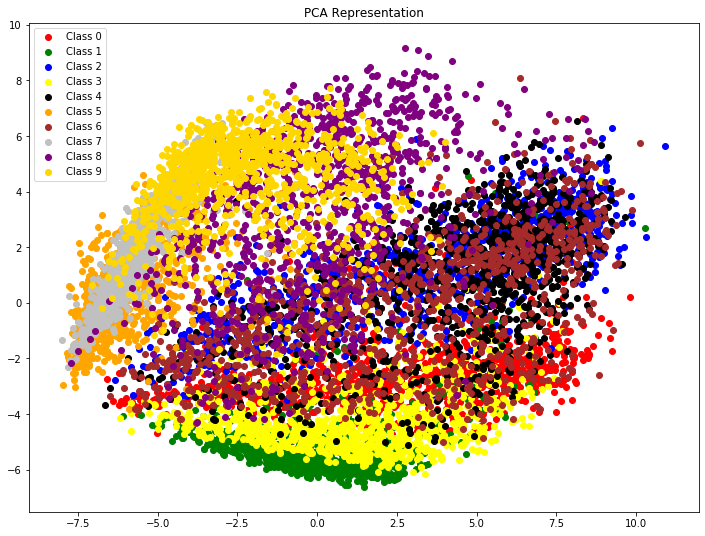

In [15]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'silver', 'purple', 'gold']
plt.figure(figsize=(12, 9))

#Scatter the data points
for i in (np.unique(train_y)):
    for j in range(len(pca_reduced_dim)):
        if train_y[j] == i:
            plt.scatter(pca_reduced_dim[j, 0], pca_reduced_dim[j, 1], color=colors[i])

#Legends
for i in (np.unique(train_y)):
       for j in range(len(pca_reduced_dim)):
            if train_y[j] == i:
                plt.scatter(pca_reduced_dim[j, 0], pca_reduced_dim[j, 1], color=colors[i], label='Class {}'.format(i))
                break
plt.legend()
plt.title("PCA Representation")
plt.show()